Note: 
    
    What hints we have in data and how we can reuse some more features

# Import libs

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os, sys
sys.path.append("../..")

import warnings
warnings.filterwarnings("ignore")

# Import data

#### define paths to data

In [2]:
path_hash_data = "../../data/HASH_and_target_time_series.parquet"
path_centrobank_data = "../../data/Kluch_stavka_and_Inflation.csv"
path_rub_to_usd_and_yuan_data = "../../data/kurs_rub_to_usd_and_uan.csv"
path_urals_in_usd_data = "../../data/urals_oil_price.csv"

#### read data

In [3]:
df_hash_data = pd.read_parquet(path_hash_data)
# df_centrobank_data = pd.read_csv(path_centrobank_data, sep=";")
df_curs_data = pd.read_csv(path_rub_to_usd_and_yuan_data)
df_urals_money_data = pd.read_csv(path_urals_in_usd_data)

#### check data

In [4]:
df_urals_money_data.head()

,data,price
0,01.01.2017,53.42
1,01.02.2017,53.67
2,01.03.2017,49.94
3,01.04.2017,51.55
4,01.05.2017,49.04


In [5]:
df_hash_data.head()

,HASH,real_weight,real_wagon_count
2017-01-01,0,5620.0,81.0
2017-02-01,0,15929.0,229.0
2017-03-01,0,17221.0,248.0
2017-04-01,0,15703.0,226.0
2017-05-01,0,3895.0,56.0


In [6]:
# df_centrobank_data.head()

In [7]:
df_curs_data.head()

,data,rub-usd,rub-uan
0,2017-01-01,59,8
1,2017-02-01,58,8
2,2017-03-01,58,8
3,2017-04-01,56,8
4,2017-05-01,56,8


# Transform addtional features time to expected format

In [8]:
df_curs_data.index = pd.to_datetime(df_curs_data.data, yearfirst=True)
df_curs_data = df_curs_data.drop(axis=1, columns=['data'])

In [9]:
df_urals_money_data.index = pd.to_datetime(df_urals_money_data.data, dayfirst=True)
df_urals_money_data = df_urals_money_data.drop(axis=1, columns=["data"])

In [10]:
df_additional_features = pd.merge(df_urals_money_data, df_curs_data, left_index=True, right_index=True)

In [11]:
df_additional_features = df_additional_features.rename(columns={"price": "price_urals_usd"})

# Merge two dataframes (HASH) and (add features)

In [12]:
df = pd.merge(df_hash_data, df_additional_features, left_index=True, right_index=True)

In [13]:
df

,HASH,real_weight,real_wagon_count,price_urals_usd,rub-usd,rub-uan
2017-01-01,0,5620.0,81.0,53.42,59,8
2017-01-01,1,487.0,7.0,53.42,59,8
2017-01-01,2,1067.0,16.0,53.42,59,8
2017-01-01,3,335.0,5.0,53.42,59,8
2017-01-01,4,133.0,2.0,53.42,59,8
...,...,...,...,...,...,...
2023-03-01,75084,1056.0,16.0,49.74,76,11
2023-03-01,75085,134.0,2.0,49.74,76,11
2023-03-01,75086,134.0,2.0,49.74,76,11
2023-03-01,75087,52.0,1.0,49.74,76,11


In [14]:
# df.to_parquet('../../data_additionalfeatures_and_hash_for_simple_start.parquet')

# Plot some intersting hints

#### Filter dataframe to work with data only after 2020.03

In [15]:
df = df[df.index >= pd.to_datetime("2020-03-01", yearfirst=True)]

In [16]:
df.head()

,HASH,real_weight,real_wagon_count,price_urals_usd,rub-usd,rub-uan
2020-03-01,0,17490.0,249.0,29.51,73,10
2020-03-01,1,69.0,1.0,29.51,73,10
2020-03-01,2,1532.0,23.0,29.51,73,10
2020-03-01,3,597.0,9.0,29.51,73,10
2020-03-01,4,131.0,2.0,29.51,73,10


In [17]:
df.corr()

,HASH,real_weight,real_wagon_count,price_urals_usd,rub-usd,rub-uan
HASH,1.000000e+00,-0.063083,-0.064932,6.310675e-14,7.045275e-15,2.105156e-14
real_weight,-6.308306e-02,1.000000,0.998963,6.689415e-05,4.862752e-04,5.115696e-04
real_wagon_count,-6.493243e-02,0.998963,1.000000,-5.078554e-05,4.905368e-04,4.870220e-04
price_urals_usd,6.310675e-14,0.000067,-0.000051,1.000000e+00,-6.779487e-02,1.372403e-01
rub-usd,7.045275e-15,0.000486,0.000491,-6.779487e-02,1.000000e+00,9.587394e-01
rub-uan,2.105156e-14,0.000512,0.000487,1.372403e-01,9.587394e-01,1.000000e+00


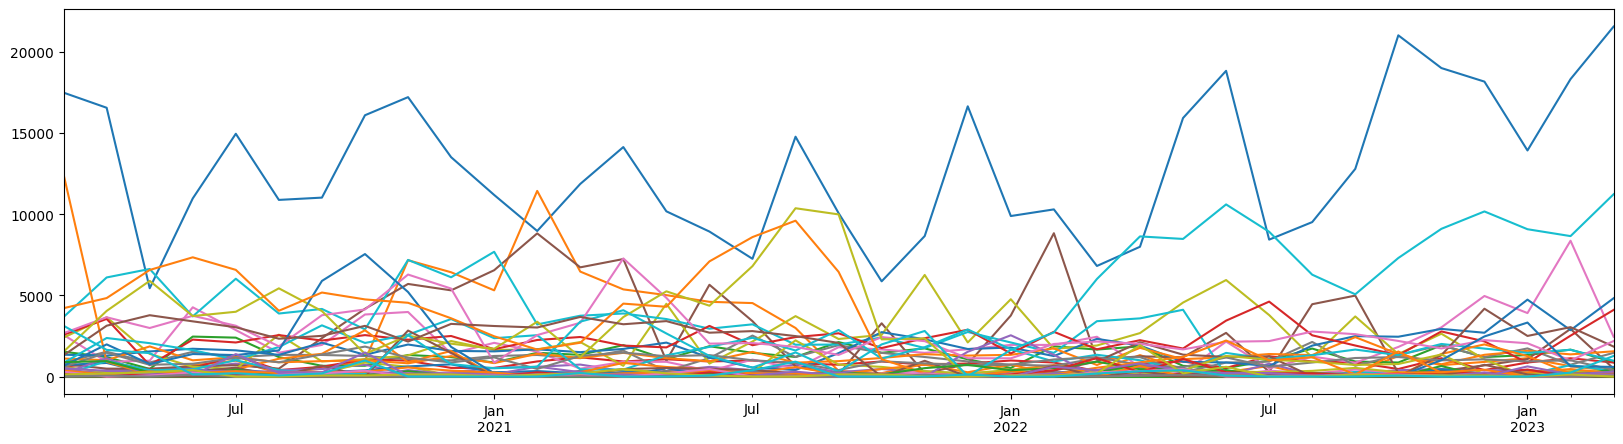

In [18]:
plt.figure(figsize=(20,5))
for ind in range(50):
    df[df.HASH == ind].real_weight.plot()

#### Count haw many wagon are not used after 2022-07-01

In [19]:
specific_filter_df = df[df.index >= pd.to_datetime("2022-03-01", yearfirst=True)]

In [20]:
not_used_way_info_df = specific_filter_df.groupby('HASH').sum()

In [21]:
list_zero_hash = not_used_way_info_df[(not_used_way_info_df.real_weight <= 1) | (not_used_way_info_df.real_wagon_count <= 5)].index.to_list()

In [22]:
print("How many data are corrupted after 2022-03-01:", len(list_zero_hash), f" This is about {round(len(list_zero_hash)/df.HASH.unique().shape[0],3)*100} %")

How many data are corrupted after 2022-03-01: 55083  This is about 73.4 %


# Simple predict feature values for list_zero_hash

In [23]:
corrupted_df = df[df.HASH.isin(list_zero_hash)]

In [24]:
corrupted_df.corr()

,HASH,real_weight,real_wagon_count,price_urals_usd,rub-usd,rub-uan
HASH,1.000000e+00,-0.026346,-0.026520,-4.440521e-14,3.332666e-14,2.869379e-14
real_weight,-2.634582e-02,1.000000,0.998582,-1.533625e-02,8.915638e-03,7.043459e-03
real_wagon_count,-2.652046e-02,0.998582,1.000000,-1.552192e-02,9.069698e-03,7.192636e-03
price_urals_usd,-4.440521e-14,-0.015336,-0.015522,1.000000e+00,-6.779487e-02,1.372403e-01
rub-usd,3.332666e-14,0.008916,0.009070,-6.779487e-02,1.000000e+00,9.587394e-01
rub-uan,2.869379e-14,0.007043,0.007193,1.372403e-01,9.587394e-01,1.000000e+00


# Get HASH data for training && testing

####
    Take only HASH which wan`t presented in list zero hash

In [25]:
not_corrupted_df = df[~df.HASH.isin(list_zero_hash)]

In [26]:
not_corrupted_df.corr()

,HASH,real_weight,real_wagon_count,price_urals_usd,rub-usd,rub-uan
HASH,1.000000e+00,-0.074055,-0.076178,-1.308453e-14,7.542487e-15,1.227273e-14
real_weight,-7.405472e-02,1.000000,0.998974,2.947229e-03,-6.864614e-04,-2.931853e-04
real_wagon_count,-7.617791e-02,0.998974,1.000000,2.869555e-03,-7.749335e-04,-4.227789e-04
price_urals_usd,-1.308453e-14,0.002947,0.002870,1.000000e+00,-6.779487e-02,1.372403e-01
rub-usd,7.542487e-15,-0.000686,-0.000775,-6.779487e-02,1.000000e+00,9.587394e-01
rub-uan,1.227273e-14,-0.000293,-0.000423,1.372403e-01,9.587394e-01,1.000000e+00


In [27]:
percent_not_corrupted_weight_in_2_years = 1 - corrupted_df.groupby('HASH').sum().real_wagon_count.sum()/not_corrupted_df.groupby('HASH').sum().real_wagon_count.sum()

In [28]:
print("percent of activity HASH objects in terms of wagon and weight", round(percent_not_corrupted_weight_in_2_years*100, 3), "%")

percent of activity HASH objects in terms of wagon and weight 92.707 %


# Define simple HoltWinters model for all HASH time series

In [29]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from typing import List
from sklearn.metrics import mean_absolute_error

In [68]:
class HoltPrediction:
    def __init__(self,
                df_original: pd.DataFrame = None,
                is_test: bool = False):
        
        self.df_original = df_original.copy()
        self.target_columns = ['real_weight', 'real_wagon_count']
        self.is_test = is_test
        
    def model_setup(self, data: np.array) -> ExponentialSmoothing:
        try: 
            model = ExponentialSmoothing(endog=data,
                                   trend="add",
                                   seasonal="mul",
                                   seasonal_periods=3,
                                   damped_trend=True,
                                   initialization_method="heuristic").fit()
        except:
            model = ExponentialSmoothing(endog=data,
                                   trend="add",
                                   seasonal="add",
                                   seasonal_periods=12,
                                   damped_trend=True,
                                   initialization_method="heuristic").fit()
        finally:
            return model
    
    def generate_index_future(self) -> pd.date_range:
        return pd.date_range(start="2023-04-01", end="2023-08-01", freq='MS')
    
    def generate_index_test(self) -> pd.date_range:
        return pd.date_range(start="2022-11-01", end="2023-03-01", freq='MS')
    
    def predict_linear_values(self):
        pass
    
    def model_prediction(self) -> List[List[int]]:
        df = self.df_original
        if self.is_test:
            df = self.df_original.iloc[:-5]
        res = []
        for column in self.target_columns:
            out = self.model_setup(df[column].values).predict(start=df.shape[0]+1,
                                                              end=df.shape[0]+5)
            out[out<0] = 0
            res.append(out)
        return res
    
    def generate_future_df(self) -> pd.DataFrame:
        return pd.DataFrame(data=np.array(self.model_prediction()).astype(int).T,
                            index=self.generate_index_future(),
                            columns=self.target_columns)
    
    def generate_past_df(self) -> pd.DataFrame:
        self.is_test = True #in case you forgot it
        return pd.DataFrame(data=np.array(self.model_prediction()).astype(int).T,
                            index=self.generate_index_test(),
                            columns=self.target_columns)
    
    def create_full_df_with_prediction(self) -> pd.DataFrame:
        return pd.concat([self.df_original, self.generate_future_df()])
    
    def calculate_score(self) -> tuple:
        "wagon, weight (mae scores)"
        self.is_test = True
        df = self.generate_past_df()
        res = mean_absolute_error(df['real_wagon_count'].values, self.df_original['real_wagon_count'][-10:-5]),\
                mean_absolute_error(df['real_weight'].values, self.df_original['real_weight'][-10:-5])
        return res
        
        
    
    

In [80]:
model_holt = HoltPrediction(df_original=not_corrupted_df[not_corrupted_df.HASH == 205])

In [81]:
model_holt.calculate_score()

(0.6, 47.0)

In [82]:
model_holt.generate_past_df()

,real_weight,real_wagon_count
2022-11-01,138,2
2022-12-01,200,3
2023-01-01,197,3
2023-02-01,238,4
2023-03-01,180,3


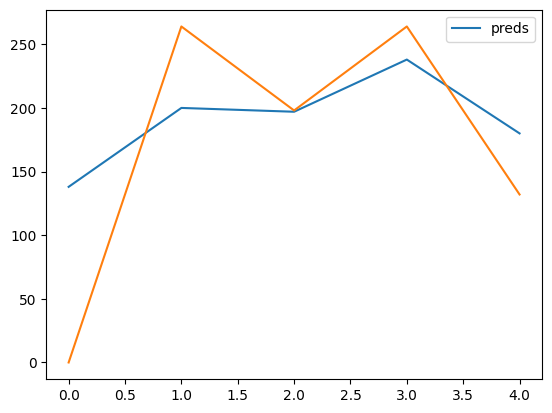

In [83]:
plt.plot(model_holt.generate_past_df().real_weight.values, label='preds')
plt.plot(model_holt.df_original[-5:].real_weight.values)
plt.legend()

In [85]:
class LinearMeanPrediction:
    def __init__(self,
                df_original: pd.DataFrame = None,
                is_test: bool = False):
        
        self.df_original = df_original.copy()
        self.target_columns = ['real_weight', 'real_wagon_count']
        self.is_test = is_test
        
    def generate_index_future(self) -> pd.date_range:
        return pd.date_range(start="2023-04-01", end="2023-08-01", freq='MS')
    
    def generate_index_test(self) -> pd.date_range:
        return pd.date_range(start="2022-11-01", end="2023-03-01", freq='MS')
    
    def predict_linear_values(self, data: np.array) -> np.array:
        return np.full((5,1), data[-10:].mean()).ravel()
    
    def model_prediction(self) -> List[List[int]]:
        df = self.df_original
        if self.is_test:
            df = self.df_original.iloc[:-5]
        return [self.predict_linear_values(df[column].values) for column in self.target_columns]
        
    def generate_future_df(self) -> pd.DataFrame:
        return pd.DataFrame(data=np.array(self.model_prediction()).astype(int).T,
                            index=self.generate_index_future(),
                            columns=self.target_columns)
    
    def generate_past_df(self) -> pd.DataFrame:
        self.is_test = True #in case you forgot it
        return pd.DataFrame(data=np.array(self.model_prediction()).astype(int).T,
                            index=self.generate_index_test(),
                            columns=self.target_columns)
    
    def create_full_df_with_prediction(self) -> pd.DataFrame:
        return pd.concat([self.df_original, self.generate_future_df()])
    
    def calculate_score(self) -> tuple:
        "wagon, weight (mae scores)"
        self.is_test = True
        df = self.generate_past_df()
        res = mean_absolute_error(df['real_wagon_count'].values, self.df_original['real_wagon_count'][-10:-5]),\
                mean_absolute_error(df['real_weight'].values, self.df_original['real_weight'][-10:-5])
        return res
        

In [86]:
model_simple_linear = LinearMeanPrediction(df_original=not_corrupted_df[not_corrupted_df.HASH == 205])

In [87]:
model_simple_linear.calculate_score()

(1.6, 50.6)

#### check mae score for both models

In [88]:
wagon_mae_holt, wagon_mae_linear = [], []
weight_mae_holt, weight_mae_linear = [], []

for hash_id in not_corrupted_df.HASH.values:
    model_simple_linear = LinearMeanPrediction(df_original=not_corrupted_df[not_corrupted_df.HASH == hash_id])
    model_holt = HoltPrediction(df_original=not_corrupted_df[not_corrupted_df.HASH == hash_id])
    res_linear = model_simple_linear.calculate_score()
    res_holt = model_holt.calculate_score()
    
    wagon_mae_holt.append(res_holt[0])
    wagon_mae_linear.append(res_linear[0])
    
    weight_mae_holt.append(res_holt[1])
    weight_mae_linear.append(res_linear[1])

/home/gishb/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/gishb/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/gishb/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/gishb/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/gishb/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/gishb/.local/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarn

UnboundLocalError: local variable 'model' referenced before assignment

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe4a419a0e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe4a419a620>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe4a4199f30>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe4a3ff9210>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe4a3ff94b0>,
 'means': []}

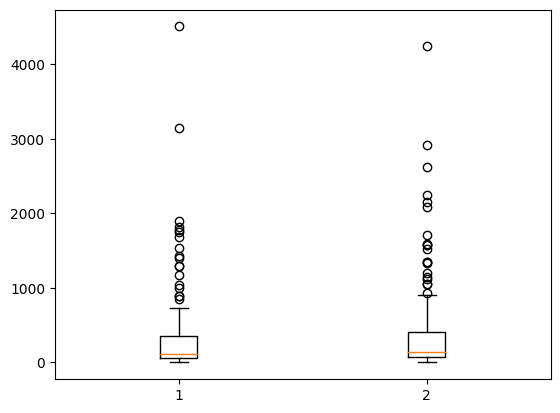

In [89]:
plt.boxplot([weight_mae_linear, weight_mae_holt])

In [110]:
# def model_setup(data: np.array) -> ExponentialSmoothing:
#     return ExponentialSmoothing(endog=data,
#                                trend="add",
#                                seasonal="add",
#                                seasonal_periods=3,
#                                damped_trend=True,
#                                initialization_method="heuristic").fit()

In [111]:
# def model_prediction(df: pd.DataFrame = None, is_test: bool = True) -> pd.DataFrame:
#     target = ['real_weight', 'real_wagon_count']
#     pred_list = []
#     for column in target:
#         pred_list.append(model_setup(df[column].values).predict(start=1, end=5))
#     if is_test:
#         index_ = pd.date_range(start="2022-11-01", end="2023-03-01", freq='MS')
#     else:
#         index_ = pd.date_range(start="2023-04-01", end="2023-08-01", freq='MS')
#     pred_df = pd.DataFrame(data=np.array(pred_list).astype(int).T, columns=target, index=index_)
#     return pd.concat([df, pred_df])
        

In [112]:
# def run_predictions(df_hashes: pd.DataFrame) -> pd.DataFrame:
#     df_hashes_preds = []
#     for hash_id in df_hashes.HASH.unique():
#         test_df = df_hashes[df_hashes.HASH == hash_id]
#         pred_df = model_prediction(test_df[['real_weight', 'real_wagon_count']])
#         pred_df['real_wagon_count'] = pred_df['real_wagon_count'].apply(lambda x: x if x > 0 else 0)
#         pred_df['real_weight'] = pred_df['real_weight'].apply(lambda x: x if x > 0 else 0)
#         pred_df['HASH'] = test_df['HASH'][0]
#         df_hashes_preds.append(pred_df.iloc[-5:])
#     return pd.concat(df_hashes_preds)

In [113]:
# def check_mae(df_pred: pd.DataFrame, df_original: pd.DataFrame) -> tuple:
#     res = []
#     for hash_id in df_pred.HASH.unique():
#         pred_df_temp = df_pred[df_pred.HASH == hash_id][-5:]
#         original_df_temp = df_original[df_original.HASH == hash_id][-5:]
        
#         pred_weight = pred_df_temp.real_weight.values
#         pred_count = pred_df_temp.real_wagon_count.values
        
#         original_weight = original_df_temp.real_weight.values
#         original_count = original_df_temp.real_wagon_count.values
#         res.append([sum(abs(original_weight-pred_weight))/5, sum(abs(original_count-pred_count))/5])
#     return res[0]

#### random check HoltWInters on not corrupted HASHes

In [37]:
# warnings.filterwarnings("ignore")


# # WARN BOOL MUST BE TRUE FOR TEST
# wagon_mae = []
# weight_mae = []
# for hash_id in not_corrupted_df.HASH.values:
#     res_temp = check_mae(run_predictions(not_corrupted_df[not_corrupted_df.HASH == hash_id][:-5]),
#                           not_corrupted_df[not_corrupted_df.HASH == hash_id])
#     wagon_mae.append(res_temp[-1])
#     weight_mae.append(res_temp[0])

KeyboardInterrupt: 

#### look at boxplot of the model

mean for wagon_mae is 14.4
mean for weight_mae is 902.6


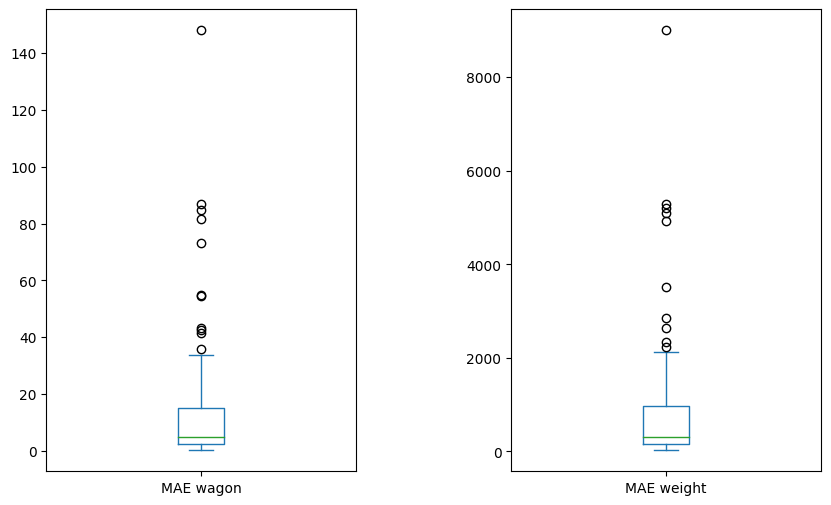

In [38]:
pd.DataFrame(data=np.array([wagon_mae, weight_mae]).T, columns=['MAE wagon', 'MAE weight']).plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(10, 6)
)


print("mean for wagon_mae is", round(np.mean(wagon_mae),2))
print("mean for weight_mae is", round(np.mean(weight_mae),2))
plt.subplots_adjust(wspace=0.5) 
plt.show()


#### Predict test values 

In [39]:
hash_samples = not_corrupted_df.HASH.sample(81).values

In [40]:
wagon_mae = []
weight_mae = []

for hash_id in hash_samples:
    res_temp = check_mae(run_predictions(not_corrupted_df[not_corrupted_df.HASH == hash_id][:-5]),
                          not_corrupted_df[not_corrupted_df.HASH == hash_id])
    wagon_mae.append(res_temp[-1])
    weight_mae.append(res_temp[0])
    
df_results_test_not_corrupted = pd.DataFrame(data=np.array([wagon_mae, weight_mae]).T,
                                             columns=['MAE wagon error',
                                                      'MAE weight error'])

In [82]:
def check_mae_MEAN_line(df_pred: pd.DataFrame, df_original: pd.DataFrame) -> tuple:
    pred_df_temp = df_pred[df_pred.HASH == hash_id].mean()
    original_df_temp = df_original[df_original.HASH == hash_id][-5:]

    pred_weight = np.full((5,1), pred_df_temp[1]).ravel()
    pred_count = np.full((5,1), pred_df_temp[2]).ravel()

    original_weight = original_df_temp.real_weight.values
    original_count = original_df_temp.real_wagon_count.values
        
    return sum(abs(original_weight-pred_weight))/5, sum(abs(original_count-pred_count))/5

In [84]:
wagon_mae = []
weight_mae = []

for hash_id in hash_samples:
    res_temp = check_mae_MEAN_line(run_predictions(not_corrupted_df[not_corrupted_df.HASH == hash_id][:-5]),
                              not_corrupted_df[not_corrupted_df.HASH == hash_id])
    wagon_mae.append(res_temp[1])
    weight_mae.append(res_temp[0])
    
df_results_test_not_corrupted_line = pd.DataFrame(data=np.array([wagon_mae, weight_mae]).T,
                                             columns=['MAE wagon error MEAN LINE',
                                                      'MAE weight error MEAN LINE'])

In [87]:
df_results_test_not_corrupted

,MAE wagon error,MAE weight error
0,4.0,350.6
1,3.6,57.0
2,17.2,1186.8
3,236.6,16796.4
4,0.0,0.0
...,...,...
76,2.0,118.4
77,0.0,0.0
78,15.6,1010.0
79,0.0,0.0


In [88]:
df_results_test_not_corrupted_line 

,MAE wagon error MEAN LINE,MAE weight error MEAN LINE
0,47522.6,653.60
1,69207.4,57.00
2,70666.8,1186.80
3,8187.4,36058.80
4,67198.0,0.00
...,...,...
76,13576.0,127.88
77,71494.0,0.00
78,8544.2,582.60
79,71143.0,0.00


In [93]:
test = not_corrupted_df[not_corrupted_df.HASH == 69211][:-5]

In [94]:
pred_df_temp = test.mean()
pred_weight_linear = np.full((5,1), pred_df_temp[1]).ravel()
pred_count_linear = np.full((5,1), pred_df_temp[2]).ravel()

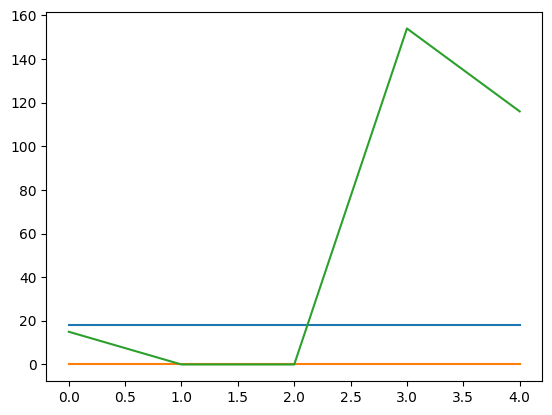

In [95]:
plt.plot(pred_weight_linear)
plt.plot(run_predictions(test).real_weight.values)
plt.plot(not_corrupted_df[not_corrupted_df.HASH == 69211][-5:].real_weight.values)